<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JoelOrlandoHR/blob/main/Actividad_Semanal_7_Regresiones_y_K_means_A00759664.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
### **Semana 7** - **Actividad Semanal 7 - Regresiones y K Mean**
###Prof Jobish Vallikavungal Devassia
<br>

###Alumno: Joel Orlando Hernández Ramos
###Matrícula: A00759664



Fecha de entrega: Noviembre 9, 2022

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

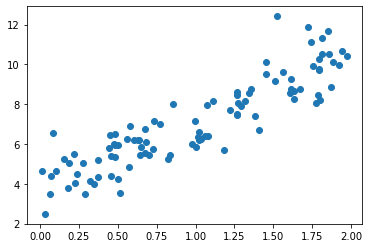

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [6]:
#X_fit[]

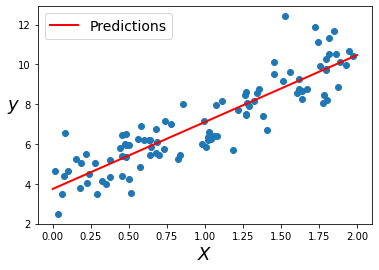

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [12]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [13]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

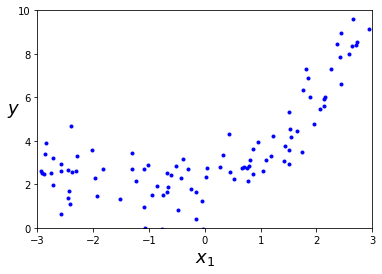

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [18]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [19]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [20]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

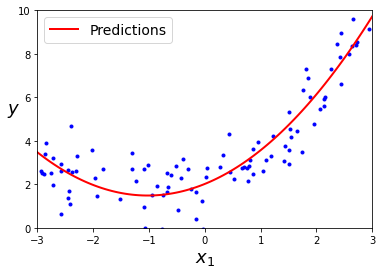

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


#**Notebook** **1**. **Regresión**. 

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [23]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [24]:
len(X)

1000

In [25]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

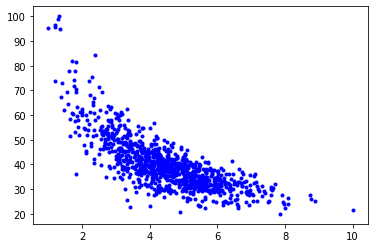

In [26]:
plt.plot(X,y,'b.')

1. **Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).**

En este caso vamos definir que el tamaño de nuestro conjunto de prueba represente el 15% de nuestra poblacion. Mientras que el conjunto de entrenamiento será del 85%.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

De ahora en adelante trabajaremos con nuestros datos de entrenamiento. Volvemos a hacer la gráfica ahora solo con los datos de entrenamiento para ver si cambio algo. 

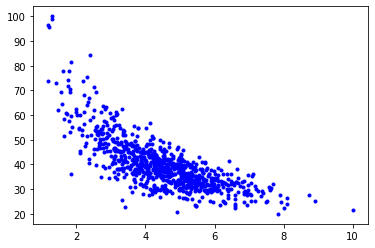

In [28]:
plt.plot(X_train, y_train, 'b.')

2. **Regresión Lineal.**
> Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

Primero definimos nuestro modelo y lo ajustamos a nuestros datos de entrenamiento. Lo guardaremos dentro de una variable.

In [29]:
#lineal
linear_reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)

Despúes de entrenar ajustar nuestro modelo a los datos de entrenamiento, podemos obtener el coeficiente y el intercept para establecer nuestra ecuación.

In [30]:
linear_reg.coef_, linear_reg.intercept_

(array([-5.91602323]), 66.44764675174278)

La ecuación que obtenemos es la siguiente:

$\hat{y} = -5.91602323X +  66.44764675174278$

Ahora realizaremos una gráfica que nos ayude a visualizar nuestros datos de entrenamiento asi como nuestro modelo de aproximación. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


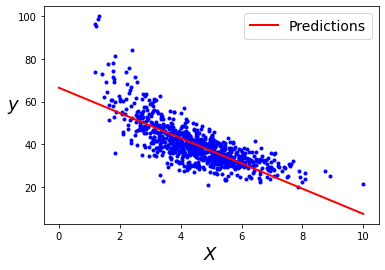

In [31]:
X_fit=t=np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.plot(X_train, y_train, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14);

In [32]:
linear_reg.score(X_train, y_train)

0.5698418288561948

EL modelo tiene una R^2 para predecir los valores de entrenamiento:

$0.5698418288561948$

>**Errores y R^2**

Ahora evaluaremos los errores y R^2 del modelo con nuestros datos de prueba. Al hacer esto nos podemos dar cuenta de que tan bueno es nuestro modelo para predecir nuevos datos que tengan un comportamiento similar. 

In [33]:
y_test_predict = linear_reg.predict(X_test)
results_MAE=list()
results_R=list()
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('r2_score',r2_score(y_test, y_test_predict))



Error medio Absoluto (MAE): 5.011595088997378
Root Mean Squared Error: 7.2416891490838875
r2_score 0.6171440942171167


3. **Regresión Polinomial.**
> Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

Primero obetenemos los datos cuadráticos a partir de nuestro arreglo de datos original.  Es importante mencionar que decicimos utilizar un polinomio de grado 2 porque los datos parecen tener un comportamiento similar al de una parábola. En este sentido, creemos que tendremos un buen rendimiento.

In [34]:
poli_feat = PolynomialFeatures(degree=2, include_bias=False)
Xtrain_poly = poli_feat.fit_transform(X_train)
Xtrain_poly

array([[ 5.78663548, 33.48515022],
       [ 4.43739951, 19.69051438],
       [ 4.50931751, 20.33394436],
       ...,
       [ 3.94046305, 15.52724904],
       [ 4.52448429, 20.4709581 ],
       [ 5.86814353, 34.43510849]])

Ahora que si tenemos datos cuadráticos y datos lineares entonces podemos hacer nuestra regresión y encontrar nuestra ecuación.

In [35]:
Poly_lin_reg = LinearRegression(fit_intercept=True)
Poly_lin_reg.fit(Xtrain_poly, y_train)
Poly_lin_reg.coef_, Poly_lin_reg.intercept_

(array([-16.27563255,   1.12121998]), 88.38865903399889)

La ecuación que obtenemos es la siguiente:

$\hat{y} =  -16.27563255X + 1.12121998X^2 + 88.38865903399889$

Ahora realizaremos una gráfica que nos ayude a visualizar nuestros datos originales asi como nuestro modelo de aproximación. 

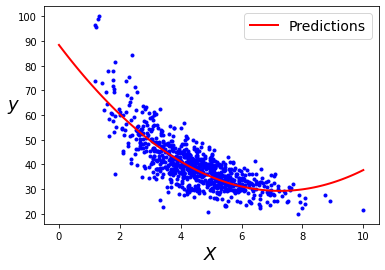

In [36]:
X_fit=np.linspace(0, 10, 100).reshape(100,1)
X_fit_poly = poly_features.transform(X_fit)

y_fit_poly = Poly_lin_reg.predict(X_fit_poly)

plt.plot(X_train, y_train, "b.")
plt.plot(X_fit, y_fit_poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14);

In [37]:
Poly_lin_reg.score(Xtrain_poly, y_train)

0.6499430928372091

EL modelo tiene una R^2 para predecir los valores de entrenamiento:

$0.6499430928372091$

>**Errores**

Ahora trabajaremos con los datos de prueba para evaluar realmente que tan bueno es nuestro modelo prediciendo datos. 

In [38]:
Xtest_poly= poly_features.fit_transform(X_test)
Poly_y_test_predict = Poly_lin_reg.predict(Xtest_poly)


print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, Poly_y_test_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Poly_y_test_predict)))
print('r2_score',r2_score(y_test, Poly_y_test_predict))



Error medio Absoluto (MAE): 4.459445302443204
Root Mean Squared Error: 6.081945518433532
r2_score 0.7299521995869951


4. **Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**
> Regresión Simple con Lasso y Ridge.

Para mayor facilidad de comparación crearemos un ciclo FOR para entrenar nuestros modelos. En este sentido, primero commenzamos por definir los modelos que vamos a utilizar.

In [39]:
modelos = []
modelos.append(('LR', LinearRegression(fit_intercept=True))) #inlcuimos el modelo sin regularizacion para simple comparacion
modelos.append(('LASSO', Lasso(alpha=10)))   
modelos.append(('RIDGE', Ridge(alpha=1000))) 

Establecemos el FOR. Dentro del ciclo entrenaremos nuestros modelos, predeciremos Y con los datos de entrenamiento y finalmente imprimiremos los coeficientes y punto de intercepción para poder hacer nuestras ecuaciones. 

In [40]:
yhat0 = []   # predicciones del modelo RLM
yhat1 = []   # predicciones del RLM con regularización L1
yhat2 = []   # predicciones del RLM con regularización L2


for name, model in modelos:
  # entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  mm = model.fit(X_train, np.ravel(y_train))
  yhat = mm.predict(X_train)
  
  print(mm.coef_)       # despleguemos los pesos obtenidos
  print(mm.intercept_)   # por si deseas conocer w0.
  

  if name=='LR':
    yhat0.append(yhat)
    print('\n')
  elif name=='LASSO':
    yhat1.append(yhat)
    print('\n')
  elif name=='RIDGE':
    yhat2.append(yhat)
    print('\n')

LR:
[-5.91602323]
66.44764675174278


LASSO:
[-0.21334864]
40.91003975191399


RIDGE:
[-3.54061463]
55.810137929146336




La ecuación linear que obtenemos sin regularización es:

$\hat{y} = -5.91602323X +  66.44764675174278$

Con Ridge:

$\hat{y} = -3.54061463X +  55.810137929146336$

Con Lasso:

$\hat{y} = -0.21334864X +  40.91003975191399$

Graficamos para visualizar de que manera afecto las distitnas regularizaciones  nuestro modelo. 

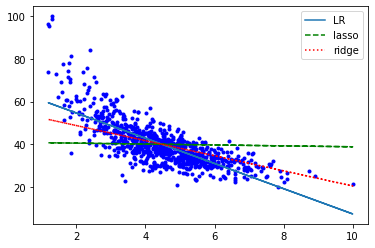

In [41]:
plt.plot(X_train, np.ravel(y_train), "b." )  

plt.plot(X_train, np.ravel(yhat0),  label='LR')  
plt.plot(X_train, np.ravel(yhat1), "g--",  label='lasso')  
plt.plot(X_train, np.ravel(yhat2), "r:" ,  label='ridge')  
plt.legend(loc="upper right")

plt.show()

>Errores

Finalmente utilizamos nuestro modelo entrenado para predecir Y con los datos de prueba. Para corroborar que tan bueno o malo es nuestro modelo imprimimos nuestros errores y R cuadrada

In [42]:
for name, model in modelos:
  print("%s:" % name)
  mm = model.fit(X_train, np.ravel(y_train))
  y_test_predict = mm.predict(X_test)


  print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_test_predict))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
  print('r2_score',r2_score(y_test, y_test_predict))
  
  results_MAE.append(metrics.mean_absolute_error(y_test, y_test_predict))
  results_R.append(r2_score(y_test, y_test_predict))

LR:
Error medio Absoluto (MAE): 5.011595088997378
Root Mean Squared Error: 7.2416891490838875
r2_score 0.6171440942171167
LASSO:
Error medio Absoluto (MAE): 8.202734838967014
Root Mean Squared Error: 11.487533514907174
r2_score 0.036594378235360825
RIDGE:
Error medio Absoluto (MAE): 5.615975698922892
Root Mean Squared Error: 8.373426244702857
r2_score 0.4881272714507666


> Regresión Polinomial con Lasso y Ridge.

Para mayor facilidad de comparación crearemos un ciclo FOR para entrenar nuestros modelos. En este sentido, primero commenzamos por definir los modelos que vamos a utilizar.

In [43]:
modelos = []
modelos.append(('PolyReg', LinearRegression(fit_intercept=True))) # nuevamente incluimos este modelo para comparacion
modelos.append(('LASSO', Lasso(alpha=-1)))   
modelos.append(('RIDGE', Ridge(alpha=1000))) 

Establecemos el FOR. Dentro del ciclo entrenaremos nuestros modelos, predeciremos Y con los datos de entrenamiento y finalmente imprimiremos los coeficientes y punto de intercepción para poder hacer nuestras ecuaciones. 

In [44]:
yhat0_pol = []   # predicciones del modelo Polinomial
yhat1_pol = []   # predicciones del RLM con regularización L1
yhat2_pol = []   # predicciones del RLM con regularización L2


for name, model in modelos:
  # entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  mm = model.fit(Xtrain_poly, y_train)
  yhat = mm.predict(Xtrain_poly)
  
  print(mm.coef_)       # despleguemos los pesos obtenidos
  print(mm.intercept_)   # por si deseas conocer w0.
  

  if name=='PolyReg':
    yhat0_pol.append(yhat)
    print('\n')
  elif name=='LASSO':
    yhat1_pol.append(yhat)
    print('\n')
  elif name=='RIDGE':
    yhat2_pol.append(yhat)
    print('\n')

PolyReg:
[-16.27563255   1.12121998]
88.38865903399889


LASSO:
[-30.63228628   2.61331984]
120.14113380292957


RIDGE:
[-1.0420178  -0.45185058]
54.47477607713823




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.452e+04, tolerance: 9.155e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


La ecuación linear que obtenemos sin regularización es:

$\hat{y} =  -16.27563255X + 1.12121998X^2 + 88.38865903399889$

Con Ridge:

$\hat{y} =  -1.0420178X - 0.45185058X^2 + 54.474776077138245$

Con Lasso:

$\hat{y} =  -30.63228628X + 2.61331984X^2 + 120.14113380292937$



Graficamos para visualizar de que manera afecto las distitnas regularizaciones  nuestro modelo. 

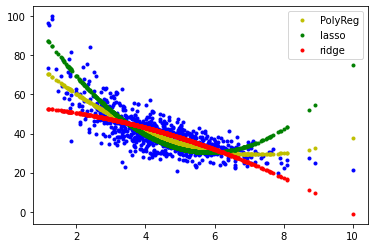

In [45]:
plt.plot(X_train, np.ravel(y_train), "b." )  

plt.plot(X_train, np.ravel(yhat0_pol), "y.", label='PolyReg')  
plt.plot(X_train, np.ravel(yhat1_pol), "g.",  label='lasso')  
plt.plot(X_train, np.ravel(yhat2_pol), "r." ,  label='ridge')  
plt.legend(loc="upper right")

plt.show()

>Errores

Finalmente utilizamos nuestro modelo entrenado para predecir Y con los datos de prueba. Para corroborar que tan bueno o malo es nuestro modelo imprimimos nuestros errores y R cuadrada

In [46]:
for name, model in modelos:
  print("%s:" % name)
  mm = model.fit(Xtrain_poly, np.ravel(y_train))
  Poly_y_test_predict = mm.predict(Xtest_poly)


  print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, Poly_y_test_predict))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Poly_y_test_predict)))
  print('r2_score',r2_score(y_test, Poly_y_test_predict))
  
  results_MAE.append(metrics.mean_absolute_error(y_test, Poly_y_test_predict))
  results_R.append(r2_score(y_test, Poly_y_test_predict))
  

PolyReg:
Error medio Absoluto (MAE): 4.459445302443204
Root Mean Squared Error: 6.081945518433532
r2_score 0.7299521995869951
LASSO:
Error medio Absoluto (MAE): 5.258585686358333
Root Mean Squared Error: 6.9055285138324995
r2_score 0.6518635960007969
RIDGE:
Error medio Absoluto (MAE): 5.564275248625166
Root Mean Squared Error: 8.21567946914912
r2_score 0.5072319202631822


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.452e+04, tolerance: 9.155e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


5. Finalmente grafica :
>MAE (de los cuatro métodos)


In [47]:
results_MAE # imprimimos rapidamente esta variable para demostrar que aqui fuimos guardando nuestros errores.

[5.011595088997378,
 8.202734838967014,
 5.615975698922892,
 4.459445302443204,
 5.258585686358333,
 5.564275248625166]

<BarContainer object of 6 artists>

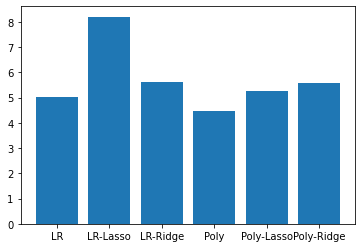

In [48]:
plt.bar(['LR', 'LR-Lasso', 'LR-Ridge', 'Poly', 'Poly-Lasso', 'Poly-Ridge'], results_MAE)

>R2 (de los cuatro métodos)

<BarContainer object of 6 artists>

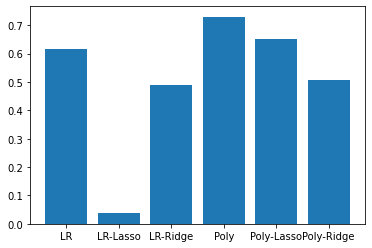

In [49]:
plt.bar(['LR', 'LR-Lasso', 'LR-Ridge', 'Poly', 'Poly-Lasso', 'Poly-Ridge'], results_R)

6. **Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

En este ejercicio, decidimos hacer una división de nuestros datos en 85% para datos de entrenamiento y 15% para datos de prueba. Según la literatura, no existe una manera efectiva de dividir nuestros datos en estos subconjuntos. No obstante, es práctica común que se dividan alrededor del 80-90% para entrenamiento y el resto para prueba con el objetivo de evitar sobre y sub entrenamiento. 

Finalmente, podemos determinar cual fue nuestro mejor acercamiento para describir nuestros datos con base en las gráficas que realizamos de los errores y r cuadrada para los modelos linear simple sin regularizacion, LR con Lasso, LR con Rigde, Polinomial simple sin regularizacion, PS con Lasso y PS con Ridge. Como podemos observar, el modelo polinomial simple es el mejor pues tiene una mayor R cuadrada (cercana al 73%) y el error MAE más pequeño (4.46). El error MAE obtenido lo podemos interpretar como   nuestro modelo polinomial simple se suele equivocar, en promedio, 4.46 unidades al momento de hacer una predicción. Ahora, cabe mencionar que es dificl establecer si un error MAE de 4.46 es bueno o malo. Esto depende totalmente de nuestro cliente y sus expectativas. En otra palabra, el error permisible y el desempeño óptimo de un modelo siempre dependeran del caso y las circunstancias. 

También cabe destacar que estadísticamente, se busca obtener una R cuadrada cercana al 100%, por lo que un 73% significa que nuestro modelo no describe por completo o de la mejor manera nuestros datos. Sería importante analizar otros grados de polinomio para determinar si una regresión polinomial es el modelo óptimo o si hay que cambiar a otro modelo más complejo. Lo que nos queda claro es que el modelo lineal es demasiado simple como para describir nuestros datos pues obtuvo solamente una R cuadrada del 61%. Esto es claro de visualizar en nuestras gráficas en donde vemos como nuestros datos estan distribuidos a lo largo de X y Y y como una simple linea no logra describirlos a todos. 


Referencias:

Jj, a. (2016, March 23). Mae and RMSE - which metric is better? Medium. Retrieved November 9, 2022, from https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d 

Minitab Blog Editor (2019). Análisis de regresión: ¿Cómo puedo interpretar el r-cuadrado y evaluar La Bondad de Ajuste? Minitab Blog. Retrieved November 9, 2022, from https://blog.minitab.com/es/analisis-de-regresion-como-puedo-interpretar-el-r-cuadrado-y-evaluar-la-bondad-de-ajuste 

Purvanshparmar  (2021, October 11). Optimal Data Division for Training Neural Network. Medium. Retrieved November 9, 2022, from https://medium.com/mlearning-ai/optimal-data-division-for-training-neural-network-3c83726e9551 



#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16245,7217400895,20140609T000000,550000.0,3,1.75,1380,3402,1.5,0,0,...,7,1380,0,1900,2000,98122,47.6109,-122.302,1500,5496
16467,3335000050,20140714T000000,397000.0,2,1.75,1610,4104,1.0,0,0,...,7,950,660,1996,0,98118,47.5565,-122.275,1510,5284
15759,7577700185,20140709T000000,550000.0,4,1.00,1440,3600,1.5,0,0,...,7,1440,0,1924,0,98116,47.5694,-122.385,1010,5175
8686,6837820330,20150429T000000,300000.0,4,2.50,2450,8932,2.0,0,0,...,8,2450,0,1990,0,98023,47.3093,-122.345,2410,8775
7395,3343901188,20150323T000000,300000.0,3,1.00,1320,7200,1.0,0,0,...,7,1320,0,1959,0,98056,47.5048,-122.190,1720,7249
7683,8827900690,20150421T000000,600000.0,3,2.00,1460,2800,1.0,0,0,...,7,730,730,1921,0,98105,47.6700,-122.295,1780,4560
12735,6073300040,20150106T000000,375000.0,4,2.25,2020,12500,2.0,0,0,...,8,2020,0,1966,0,98056,47.5403,-122.175,1800,13175
4685,9201000100,20150414T000000,765000.0,3,2.50,2300,9752,2.0,0,2,...,8,2300,0,1968,2003,98075,47.5825,-122.076,2640,10764
7047,1545805980,20141110T000000,390000.0,3,2.50,2770,8820,1.0,0,0,...,7,1900,870,1980,2004,98038,47.3685,-122.048,1850,10920
14028,2724069103,20140828T000000,389000.0,3,1.75,1400,10018,1.0,0,0,...,7,1400,0,1962,0,98027,47.5327,-122.032,1350,9300


In [51]:
df.info() # nos damos cuenta del tipo de datos que tenemos y de que no tenemos datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [52]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [53]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


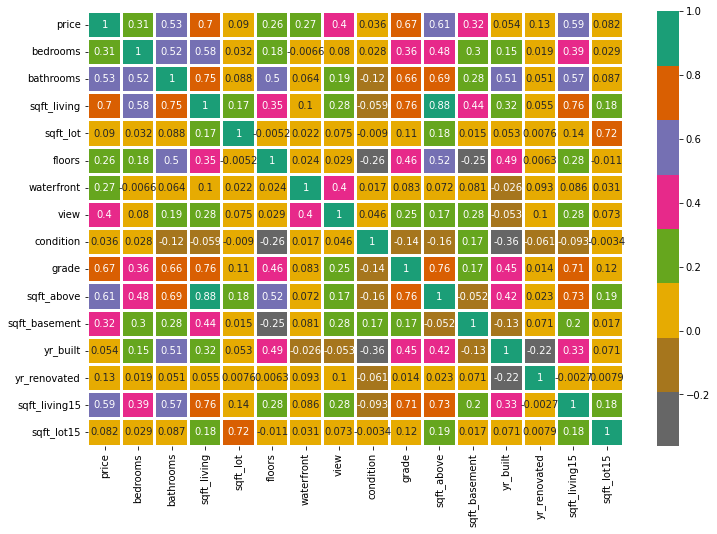

In [54]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [55]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X2 = df[features]
y2 = df[label]

1. **Divide los datos.**
>Utiliza la función train_test_split (ya esta en el notebook).

Dividiremos los datos en 90% entrenamiento y 10% datos de prueba.

In [56]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train2)}')
print(f'Tamaño de X_train: {X_train2.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test2)}')
print(f'Tamaño del X_test: {X_test2.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


2. **Regresión Múltiple Lineal.**
>Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

De ahora en adelante trabajaremos con nuestros datos de entrenamiento. 

Primero definimos nuestro modelo y lo ajustamos a nuestros datos de entrenamiento. Lo guardaremos dentro de una variable.

In [57]:
#lineal
Mult_linear_reg = LinearRegression(fit_intercept=True).fit(X_train2, y_train2)

Despúes de entrenar ajustar nuestro modelo a los datos de entrenamiento, podemos obtener el coeficiente y el intercept para establecer nuestra ecuación.

In [58]:
Mult_linear_reg.coef_, Mult_linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

La ecuación que obtenemos es la siguiente:

$\hat{y}$ = -3.82008048e+04 **X1** + 4.14661380e+04 **X2** + 1.07992584e+02 **X3** + 1.71356997e-02 **X4** + 3.16916913e+04 **X5** + 5.52691023e+05 **X6** + 4.12493228e+04 **X7** + 2.12221443e+04 **X8** + 1.19493216e+05 **X9** + 4.77750271e+01 **X10** + 6.02175565e+01 **X11** - 3.55090216e+03 **X12** + 1.32602215e+01 **X13** + 2.90059284e+01 **X14** - 5.48132603e-01 **X15** + 6151359.2627409

In [59]:
Mult_linear_reg.score(X_train2, y_train2)

0.6529196653133833

EL modelo tiene una R^2 para predecir los valores de entrenamiento:

$0.6529196653133833$

>**Errores**

Ahora evaluaremos los errores y R^2 del modelo con nuestros datos de prueba. Al hacer esto nos podemos dar cuenta de que tan bueno es nuestro modelo para predecir nuevos datos que tengan un comportamiento similar. 

In [60]:
y_test2_predict = Mult_linear_reg.predict(X_test2)
results2_MAE=list()
results2_R=list()
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test2, y_test2_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_test2_predict)))
print('r2_score',r2_score(y_test2, y_test2_predict))



Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


3. **Regresión Polinomial.**
> Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

Primero obetenemos los datos cuadráticos a partir de nuestro arreglo de datos original. 

In [61]:
Multi_poli_feat = PolynomialFeatures(degree=2, include_bias=False) #En este caso intentaremos con un polinomio de grado 2
Xtrain2_poly = Multi_poli_feat.fit_transform(X_train2)
Xtrain2_poly

array([[5.00000000e+00, 2.75000000e+00, 3.75000000e+03, ...,
        9.73440000e+06, 2.26356000e+07, 5.26350250e+07],
       [4.00000000e+00, 4.50000000e+00, 5.25000000e+03, ...,
        6.25000000e+06, 1.20880000e+08, 2.33791590e+09],
       [3.00000000e+00, 2.50000000e+00, 2.88000000e+03, ...,
        8.76160000e+06, 3.11214400e+07, 1.10544196e+08],
       ...,
       [3.00000000e+00, 2.25000000e+00, 1.78000000e+03, ...,
        2.28010000e+06, 1.15137500e+07, 5.81406250e+07],
       [2.00000000e+00, 1.00000000e+00, 1.15000000e+03, ...,
        2.14036900e+06, 6.32016000e+06, 1.86624000e+07],
       [3.00000000e+00, 1.00000000e+00, 1.45000000e+03, ...,
        1.08160000e+06, 8.04960000e+06, 5.99076000e+07]])

Ahora que si tenemos datos cúbicos, cuadráticos y lineares entonces podemos hacer nuestra regresión y encontrar nuestra ecuación.

In [62]:
Multi_Poly_lin_reg = LinearRegression(fit_intercept=True)
Multi_Poly_lin_reg.fit(Xtrain2_poly, y_train2)
print('La ecuacion es\n', Multi_Poly_lin_reg.coef_, Multi_Poly_lin_reg.intercept_)


La ecuacion es
 [[ 9.33912834e+05 -1.09330730e+06 -4.56449932e+02 -2.78686288e+01
  -2.07407238e+06 -3.95431870e+06 -2.88638026e+05  5.58697570e+05
   1.09864510e+06 -2.19758415e+02 -3.82034272e+02 -8.59630908e+04
  -2.95351595e+03  3.99965710e+03 -3.40106316e+01  9.57541696e+02
   7.49958190e+03 -1.37969466e+01 -1.84926695e-02  8.57699569e+03
  -1.14965893e+04 -3.06588900e+02 -5.24628836e+03 -5.36788065e+03
  -1.20757669e+00 -1.46068182e+01 -4.67099451e+02 -9.13191519e+00
   1.72800642e+01  2.15500198e-01 -9.63429892e+03  1.53879172e+01
  -1.35842369e-01 -2.59067293e+04  4.33707238e+04  3.82942459e+03
  -1.07592927e+03  2.22971689e+04  1.44292325e+01  1.33928361e+00
   5.03401980e+02 -1.70798805e+01 -1.72895923e+01 -5.56785248e-02
   1.56185890e+00 -4.34972758e+00  4.83299456e+00  1.60303193e+02
  -1.42711737e+01  1.31138593e+01  2.07283397e+01  2.61335089e+00
  -4.41381412e+00 -2.20765903e+00  6.36282684e-02  3.53629072e+00
   1.88176819e+01  3.06637958e-07  4.40839907e-01 -9.8421613

La ecuación que obtenemos es demasiado compleja como para plasmarla visualmente. No obstante nos podemos dar cuenta que tendra una cantidad muy grande de coeficientes lineares y cuadraticos así como una intersección en 80227028

In [63]:
Multi_Poly_lin_reg.score(Xtrain2_poly, y_train2)

0.7469519325162244

EL modelo tiene una R^2 para predecir los valores de entrenamiento:

$0.7469519325162244$

>**Errores**

Ahora trabajaremos con los datos de prueba para evaluar realmente que tan bueno es nuestro modelo prediciendo datos. 

In [64]:
Xtest2_poly= poly_features.fit_transform(X_test2)
Multi_Poly_y_test_predict = Multi_Poly_lin_reg.predict(Xtest2_poly)


print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test2, Multi_Poly_y_test_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, Multi_Poly_y_test_predict)))
print('r2_score',r2_score(y_test2, Multi_Poly_y_test_predict))



Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score 0.7797929072570198


4. **Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**
> Regresión Simple con Lasso y Ridge.

In [65]:
modelos = []
modelos.append(('LR', LinearRegression(fit_intercept=True)))
modelos.append(('LASSO', Lasso(alpha=10000)))   
modelos.append(('RIDGE', Ridge(alpha=10000))) 

In [66]:
multi_yhat0 = []   # predicciones del modelo RLM
multi_yhat1 = []   # predicciones del RLM con regularización L1
multi_yhat2 = []   # predicciones del RLM con regularización L2


for name, model in modelos:
  # entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  mm = model.fit(X_train2, np.ravel(y_train2))
  yhat = mm.predict(X_train2)
  print('La ecuacion es')
  print(mm.coef_, ' +')       # despleguemos los pesos obtenidos
  print(mm.intercept_)   # por si deseas conocer w0.
  

  if name=='LR':
    multi_yhat0.append(yhat)
    print('\n')
  elif name=='LASSO':
    multi_yhat1.append(yhat)
    print('\n')
  elif name=='RIDGE':
    multi_yhat2.append(yhat)
    print('\n')

LR:
La ecuacion es
[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
  3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
  1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
  1.32602215e+01  2.90059284e+01 -5.48132603e-01]  +
6151359.262740902


LASSO:
La ecuacion es
[-2.13628686e+04  0.00000000e+00  2.69281711e+02 -6.36310322e-03
  0.00000000e+00  0.00000000e+00  5.25969355e+04  0.00000000e+00
  1.06628001e+05 -7.89029483e+01 -8.03204837e+01 -3.09087540e+03
  2.86572475e+01  3.10206739e+01 -6.04977989e-01]  +
5423119.06019539


RIDGE:
La ecuacion es
[-2.51223687e+04  1.44023771e+04  1.41072403e+02  1.29102081e-02
  1.42354290e+04  8.44266514e+03  3.73832070e+04  8.63498276e+03
  5.98545703e+04  7.28886899e+01  6.81837127e+01 -2.94461889e+03
  3.31839575e+01  5.82180523e+01 -6.61305915e-01]  +
5325881.320694014




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.714e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


La ecuación que obtenemos es demasiado compleja como para plasmarla visualmente

In [67]:
for name, model in modelos:
  print("%s:" % name)
  mm = model.fit(X_train2, np.ravel(y_train2))
  y_test2_predict = mm.predict(X_test2)


  print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test2, y_test2_predict))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_test2_predict)))
  print('r2_score',r2_score(y_test2, y_test2_predict))
  
  results2_MAE.append(metrics.mean_absolute_error(y_test2, y_test2_predict))
  results2_R.append(r2_score(y_test2, y_test2_predict))

LR:
Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814
LASSO:
Error medio Absoluto (MAE): 142189.48807400462
Root Mean Squared Error: 243265.4824252908
r2_score 0.6243813993555198
RIDGE:
Error medio Absoluto (MAE): 146021.2797642382
Root Mean Squared Error: 247585.2807358276
r2_score 0.6109228252244532


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.714e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


> Regresión Polinomial con Lasso y Ridge.

In [68]:
modelos = []
modelos.append(('PolyReg', LinearRegression(fit_intercept=True)))
modelos.append(('LASSO', Lasso(alpha=-1)))   
modelos.append(('RIDGE', Ridge(alpha=1000))) 

In [69]:
multi_yhat0_pol = []   # predicciones del modelo Polinomial
multi_yhat1_pol = []   # predicciones del RLM con regularización L1
multi_yhat2_pol = []   # predicciones del RLM con regularización L2


for name, model in modelos:
  # entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  print('La ecuacion es')
  mm = model.fit(Xtrain2_poly, y_train2)
  yhat = mm.predict(Xtrain2_poly)
  
  print(mm.coef_)       # despleguemos los pesos obtenidos
  print(mm.intercept_)   # por si deseas conocer w0.
  

  if name=='PolyReg':
    multi_yhat0_pol.append(yhat)
    print('\n')
  elif name=='LASSO':
    multi_yhat1_pol.append(yhat)
    print('\n')
  elif name=='RIDGE':
    multi_yhat2_pol.append(yhat)
    print('\n')

PolyReg:
La ecuacion es
[[ 9.33912834e+05 -1.09330730e+06 -4.56449932e+02 -2.78686288e+01
  -2.07407238e+06 -3.95431870e+06 -2.88638026e+05  5.58697570e+05
   1.09864510e+06 -2.19758415e+02 -3.82034272e+02 -8.59630908e+04
  -2.95351595e+03  3.99965710e+03 -3.40106316e+01  9.57541696e+02
   7.49958190e+03 -1.37969466e+01 -1.84926695e-02  8.57699569e+03
  -1.14965893e+04 -3.06588900e+02 -5.24628836e+03 -5.36788065e+03
  -1.20757669e+00 -1.46068182e+01 -4.67099451e+02 -9.13191519e+00
   1.72800642e+01  2.15500198e-01 -9.63429892e+03  1.53879172e+01
  -1.35842369e-01 -2.59067293e+04  4.33707238e+04  3.82942459e+03
  -1.07592927e+03  2.22971689e+04  1.44292325e+01  1.33928361e+00
   5.03401980e+02 -1.70798805e+01 -1.72895923e+01 -5.56785248e-02
   1.56185890e+00 -4.34972758e+00  4.83299456e+00  1.60303193e+02
  -1.42711737e+01  1.31138593e+01  2.07283397e+01  2.61335089e+00
  -4.41381412e+00 -2.20765903e+00  6.36282684e-02  3.53629072e+00
   1.88176819e+01  3.06637958e-07  4.40839907e-01 -9

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+14, tolerance: 2.572e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.08465e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


La ecuación que obtenemos en cada modelo es demasiado compleja como para plasmarla visualmente

In [70]:
for name, model in modelos:
  print("%s:" % name)
  mm = model.fit(Xtrain2_poly, np.ravel(y_train2))
  Poly_y_test2_predict = mm.predict(Xtest2_poly)


  print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test2, Poly_y_test2_predict))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, Poly_y_test2_predict)))
  print('r2_score',r2_score(y_test2, Poly_y_test2_predict))
  
  results2_MAE.append(metrics.mean_absolute_error(y_test2, Poly_y_test2_predict))
  results2_R.append(r2_score(y_test2, Poly_y_test2_predict))
  

PolyReg:
Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
r2_score 0.7797929072570198
LASSO:
Error medio Absoluto (MAE): 122441.95637290736
Root Mean Squared Error: 187923.50392459467
r2_score 0.775845060684101
RIDGE:
Error medio Absoluto (MAE): 121606.5777392163
Root Mean Squared Error: 185766.42873735217
r2_score 0.7809614406687064


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+14, tolerance: 2.572e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.08465e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


5. Finalmente grafica :
>MAE (de los cuatro métodos)


In [71]:
results2_MAE

[137480.1388273178,
 142189.48807400462,
 146021.2797642382,
 121314.06948173394,
 122441.95637290736,
 121606.5777392163]

<BarContainer object of 6 artists>

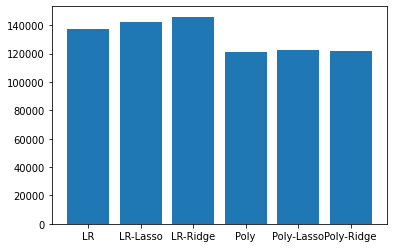

In [72]:
plt.bar(['LR', 'LR-Lasso', 'LR-Ridge', 'Poly', 'Poly-Lasso', 'Poly-Ridge'], results2_MAE)

>R2 (de los cuatro métodos)

<BarContainer object of 6 artists>

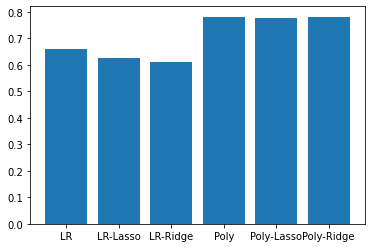

In [73]:
plt.bar(['LR', 'LR-Lasso', 'LR-Ridge', 'Poly', 'Poly-Lasso', 'Poly-Ridge'], results2_R)

6. Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

En el ejercicio número dos decidimos hacer una partición diferente de los datos. Cómo el código ya lo sugería, los datos fueron partidos en un 90-10% para los datos de entrenamiento y prueba, respectivamente. Nuevamente, recalcamos que no existe manera ideal de partir lo datos, no obstante, esta división se encuentra dentro de los parámetros normales para evitar sub-entrenamiento y sobre-entrenamiento.

Finalmente, podemos determinar cual fue nuestro mejor acercamiento para describir nuestros datos con base en las gráficas que realizamos de los errores y r cuadrada para los modelos linear múltiple sin regularizacion, LM con Lasso, LM con Rigde, Polinomial múltiple sin regularizacion, PM con Lasso y PM con Ridge. Como podemos observar, el modelo polinomial Múltiple con regularización Ridge  es el mejor pues tiene una mayor R cuadrada (ligeramente sobre el 78%) y el error MAE más pequeño (121606.58). El error MAE obtenido lo podemos interpretar como nuestro modelo polinomial simple se suele equivocar, en promedio, 121606.57 unidades al momento de hacer una predicción. Pudiese parecer que el error es muy grande por ser cientos de miles de unidades, no obstante, es importante poner este error en contexto de nuestros datos para saber si realmente es un error importante. Probablemente, para tener una mejor idea de que tan grande o pequeño es nuestro error era primero necesario estandarizar y normalizar nuestras variables de entrada X. Ahora, cabe mencionar que es dificl establecer si un error MAE de 121606.57, estandarizado o no, es bueno o malo. Nuevamente esto depende totalmente de nuestro cliente y sus expectativas. En otra palabra, el error permisible y el desempeño óptimo de un modelo siempre dependeran del caso y las circunstancias.

Adicionalmente, es importante destacar que para este modelo utilizar un modelo lineal o de regresión termino por definir modelos con demasiadas variables lo cual es complicado de computar, interpretar e incluso dificil de visualizar. En este sentido, parece que necesario explorar la idea de utilizar alguna técnica de reducción de dimensionalidades si lo que se busca es utilizar Regresión Lineal y/o polinomial.

De igual manera que en el caso anterior, se busca obtener una R cuadrada cercana al 100%, pues esto quiere decir que toda la variacion de nuestros datos se encuentra explicada por nuestro modelo. En este sentido, un 78% significa que nuestro modelo no describe por completo o de la mejor manera nuestros datos. Sería importante analizar otros grados de polinomio para determinar si una regresión polinomial es el modelo óptimo o si hay que cambiar a otro modelo más complejo. 

Referencias:

Jj, a. (2016, March 23). Mae and RMSE - which metric is better? Medium. Retrieved November 9, 2022, from https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d 

Minitab Blog Editor (2019). Análisis de regresión: ¿Cómo puedo interpretar el r-cuadrado y evaluar La Bondad de Ajuste? Minitab Blog. Retrieved November 9, 2022, from https://blog.minitab.com/es/analisis-de-regresion-como-puedo-interpretar-el-r-cuadrado-y-evaluar-la-bondad-de-ajuste 

Purvanshparmar  (2021, October 11). Optimal Data Division for Training Neural Network. Medium. Retrieved November 9, 2022, from https://medium.com/mlearning-ai/optimal-data-division-for-training-neural-network-3c83726e9551 



>**CONCLUSIONES**

En este ejercicio realizamos el ajuste de modelos de regresión (lineal y polinomial) con y sin regularización para describir distintas bases de datos. En mi opinión estos modelos son óptimos cuando podemos tener una idea de como se distribuyen nuestros datos en un espacio. Por ejemplo, si tenemos una base de datos sencillas como en el primer ejemplo, donde solo tenemos una variable de entrada X y una de salida Y, entonces, es fácil ver si nuestros gráficos se comportan de manera lineal, cuadrática o cúbica. De esta manera podemos realizar un modelo que se ajuste a este comportamiento y obtengamos buenos de resultados de R cuadrada con errores de predicción mínimos.

No obstante, cuando tenemos casos muy complejos, cómo en el segundo caso donde teniamos 15 variables de entrada y una de salida, entonces parece que nuestros modelos de Regresión no son lo suficientemente complejos como para describir toda esas variables y dimensiones. Incluso no es imposible gráficar todas estas dimensiones para ver el comportamiento y poder determinar si un polinomio describiría correctamente la distribución de nuestros datos. En este sentido, y como data analysts, es importante identificar otros modelos que puedan adaptarse mejor o realizar una reducción de dimensionalidad a nuestro dataset. 

Referencias:

Princeton University, U. (n.d.). DSS - introduction to regression. Princeton University. Retrieved November 9, 2022, from https://dss.princeton.edu/online_help/analysis/regression_intro.htm#:~:text=Regression%20analysis%20is%20used%20when,logistic%20regression%20should%20be%20used. 


#**NOTEBOOK 2**

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [74]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 13.8 MB/s 
     |████████████████████████████████| 1.0 MB 17.9 MB/s 
     |████████████████████████████████| 1.7 MB 47.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 68.6 MB/s 
     |████████████████████████████████| 6.3 MB 42.9 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=72be0cf497bbaca18e6c0e9d213ef53da137b69d7b82c2550e824071be4ff8dd
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=a14454238b2fdc5bae13ad9755ff5f6f7c6af376e2870d1f678fb00cc5a06822
  Stored in directory: /root/

In [75]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

Importa la base de datos

In [76]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [77]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [79]:
latlong=df[["latitude","longitude"]]

In [80]:
latlong.head()

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422


¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

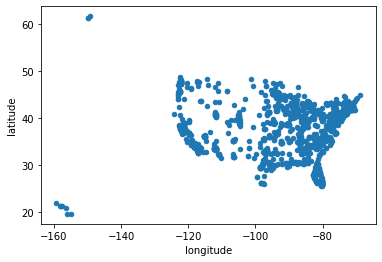

In [81]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [82]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [84]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [85]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [86]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [87]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

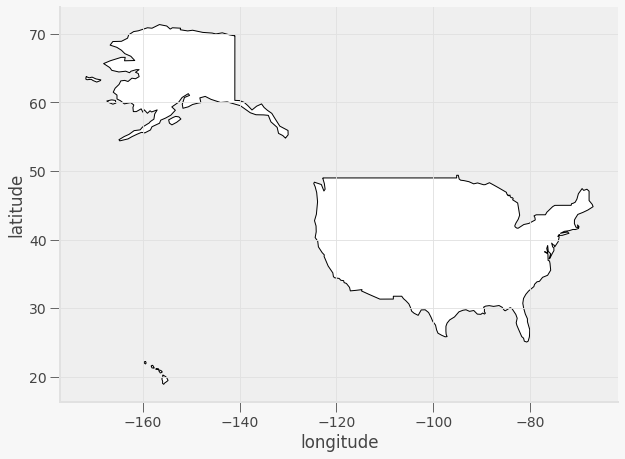

In [88]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

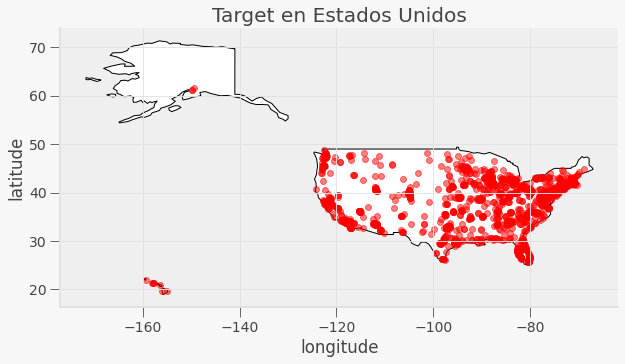

In [89]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

#**Ejercicio 3**

1. Encuentra el numero ideal de almacenes, justifica tu respuesta:



>¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

Comenzaremos por graficar la curva de codo.

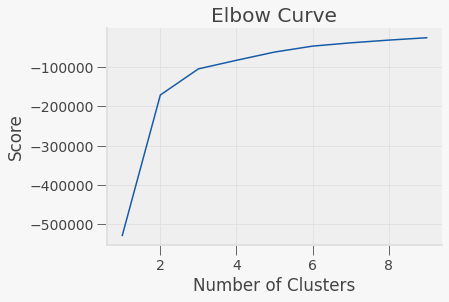

In [90]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


**JUSTIFICACIÓN**

Según la bibliografía cuando utilizamos Kmeans no hay una manera exacta de establecer el número correcto de clusters. No obstante, uno de los métodos más utilizados es la gráfica Elbow. Este método del codo se utiliza para determinar el número óptimo de clusters en el agrupamiento de k-means. En este sentido la gráfica del método muestra el valor de la función de costo producida por diferentes valores de k. En otras palabras traza la distancia media entre los puntos de datos y su centroide. En este sentido si k aumenta, la distancia media entre los puntos de datos y su centroid disinuye. En otras palabras, la distorsión promedio disminuirá pues cada grupo tendrá menos instancias y las instancias estarán más cerca de sus respectivos centroides.

Sin embargo, como lo muestra la gráfica, las mejoras en la distorsión promedio disminuirán a medida que aumente k. El valor de k en el que la mejora en la distorsión disminuye más se denomina codo, en el que debemos dejar de dividir los datos en grupos adicionales. Es como el punto de inflexion de la gráfica.

En nuestro caso en particular, K=3 representa el punto codo. Es decir, que cada vex que aumentemos K a un número mayor a 3, la gráfica crecera más lentamente. 

REREFENCIAS:

Dangeti, P. (2022). Statistics for Machine Learning. O'Reilly Online Learning. Retrieved November 9, 2022, from https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml#:~:text=The%20elbow%20method%20is%20used,by%20different%20values%20of%20k 

NA. (2018, March 12). K-Means en Python paso a paso. Aprende Machine Learning. Retrieved November 9, 2022, from https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/ 

> Encuentra las latitudes y longitudes de los almacenes.

Ya que sabemos la cantidad de clusters ideal. Realizamos Kmeans y obtenemos nuestros centroides. La ubicación de los centroides correspondera a la localización de nuestros almacenes. 

In [91]:
kmeans = KMeans(n_clusters=3).fit(latlong)
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['latitude', 'longitude'])
print(centroids)

    latitude   longitude
0  37.789554  -78.569908
1  37.487342 -118.624473
2  37.980063  -93.327172


A continuación gráficaremos nuestros almacenes y visualizaremos a cuales tiendas surtiran en USA. 

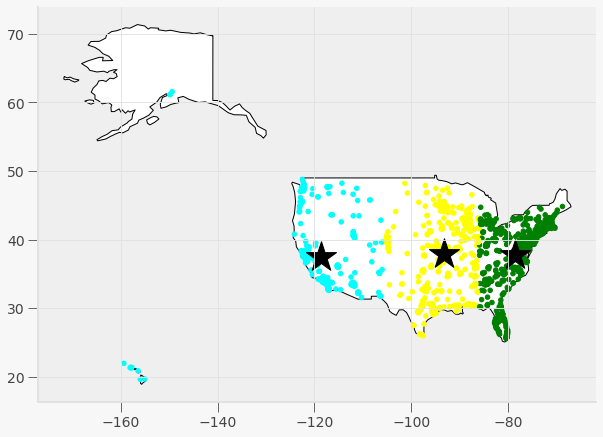

In [92]:
labels = kmeans.predict(latlong)


colores=['green','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig, ax= plt.subplots(figsize=(10,10))
world.query("name == 'United States of America'").plot(ax = ax, edgecolor='black', color='white') #utilizamos el grafico en forma de mapa.
ax.scatter( latlong["longitude"],latlong["latitude"], c=asignar,s=20) # se dividiran las tiendas por colores de acuerdo al almacen que las surtira
ax.scatter(centroids["longitude"],centroids["latitude"], marker='*', c='black', s=1000) #mostraremos los almacenes con una estrella

Ahora utilizaremos una libreria que nos ayudara a convertir la longitud y latitud de nuestros centroides en una direccion con ciudad y estado. De esta manera, sabremos la ciudad en la que esta localizado cada almacen. 

In [93]:
Centroid1= str(centroids['latitude'][0])+','+ str(centroids['longitude'][0]) #primero tenemos que convertir en string nuestros datos para que funcione 
Centroid2=str(centroids['latitude'][1])+','+ str(centroids['longitude'][1])
Centroid3= str(centroids['latitude'][2])+','+ str(centroids['longitude'][2])

In [94]:
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim
from geopy.distance import geodesic


citylocator= Nominatim(user_agent='my-application')
Centroids_loc=[Centroid1, Centroid2, Centroid3]

for i in Centroids_loc:
  location= citylocator.reverse(i)

  print(location.address)

Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States
Paradise Estates, Mono County, California, United States
Hickory County, Missouri, United States


Ahora que sabemos en que lugar de USA estarán nuestros almacenes procederemos a revisar la cantidad de tiendas que surtiran cada uno.

In [95]:
pd.Series.value_counts(labels) #esta funcion nos devuelve el numero de instancias en cada cluster

0    826
2    628
1    385
dtype: int64

>¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

A continuación se muestra un resumen que responde todas las preguntas planteadas en el ejercicio 3

In [96]:
Almacenes_Summary= pd.DataFrame()
Almacenes_Summary['Almace_latitude']=centroids['latitude']
Almacenes_Summary['Almace_logitude']=centroids['longitude']
Almacenes_Summary['Almacen_Estado']= ['Virginia', 'Missouri', 'California']
Almacenes_Summary['Tiendas_atentidas']=pd.Series.value_counts(labels)
Almacenes_Summary

,Almace_latitude,Almace_logitude,Almacen_Estado,Tiendas_atentidas
0,37.789554,-78.569908,Virginia,826
1,37.487342,-118.624473,Missouri,385
2,37.980063,-93.327172,California,628


In [97]:
distancia1= str(geodesic(Centroid1,Centroid2).miles)
print('La distancia entre el almacen de Virginia a Missouri es de', distancia1, 'millas')
distancia2= str(geodesic(Centroid2,Centroid3).miles)
print('La distancia entre el almacen de Missouri a California es de', distancia2, 'millas')
distancia3= str(geodesic(Centroid1,Centroid3).miles)
print('La distancia entre el almacen de Virginia a California es de', distancia3, 'millas')

La distancia entre el almacen de Virginia a Missouri es de 2179.654449831999 millas
La distancia entre el almacen de Missouri a California es de 1381.7597109962394 millas
La distancia entre el almacen de Virginia a California es de 805.9209470497035 millas


2. **Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.**

>¿qué librerías nos pueden ayudar a graficar este tipo de datos?

1. Geopy: Esta es la librería que se utilizo para traducir la longitud y latitud de nuestros centroides en Estados de EUA. El geocoding es el proceso computacional de transformar la descripción de una dirección física en una ubicación en la superficie de la Tierra. En este sentido, geopy es una librería altamente utilizada pare geocoding. En mi opinion, geopy realmente facilita geopy facilita utilizar las coordenadas de direcciones, ciudades, países y puntos de referencia para ubicarnos en el mundo geográfico. 

2. ipyleaflet: Esta es una librería de suma importancia pues nos permite crear mapas  interactivos en nuestro notebook. COn esta librearia se puede controlar una variedad de personalizaciones como cargar mapas base, geojson y widgets. También ofrece una amplia gama de tipos de mapas para elegir, incluyendo coropletas, datos de velocidad y vistas de lado a lado. Cómo hemos visto a lo largo de maestría, la manera en la que presentas y se vizualizan tus datos es de suma importancia por lo que poder crear mapas interactivos, en mi opinión, a porta bastante a la experiencia que el usuario puede tener con tu database. 

3. Geemap: Por lo que he leido de esta librería, su uso es un poco más específico que el resto. No obstante, esto la hace super útil. La carácteristica principla de Geemap es que está destinado más a la ciencia y el análisis de datos utilizando Google Earth Engine (GEE). Aunque tiene otras funciones, esta se usa específicamente para explorar el catálogo de múltiples petabytes de imágenes satelitales en GEE para sus aplicaciones y usos específicos con datos de detección remota. En mi opinión esto es super interesante y útil pues la detección remota de fenomenos por medio de satelites es sumamente importante para la toma de decisiones en situaciones de crisis, por ejemplo, en incendios forestales. 

> Consideras importante que se grafique en un mapa?, ¿por qué?

Claro que existen situaciones donde graficar un mapa es clave. Como ya he mencionado, en la ciencia de datos no solo es importante la manera en la que limpias y procesas tu dataset, sino también la manera en la que se lo presentas al público. Si en este caso, estamos hablando de coordenadas en donde van a estar localizadas nuestras tiendas y almacenes, es muy probable que si presentamos esos números a nuestros stakeholders no les signifique mucho. Al final, son números cuyo significado es díficil de imagnar. Por el contrario, si con ayuda de Python y sus librerías, logramos convertir esa información en un mapa para obtener una mejor visualización de datos, entonces esto claramente ayudará a la toma de decisiones acertada. 

>Agrega las conclusiones

Finalmente, después de realizar este ejercicio, podemos concluir que dentro del tipo de datos que podemos recibir por parte de un cliente o un socio se pueden encontrar datos geofráficos. Estos datos, incluso, pueden ser los más significativos para resolver un problema. En este sentido, es importante conocer que existen muchas liberías en python que nos ayudan a procesar, analizar y gráficar estos datos geográficor por medio de geocoding. Especificamente, en este ejercicio, fuimos capaces de localizar en un mapa todas las tiendas Target en Estados Unidos. Adicionalmente, por medio de K-means pudimos agrupar esas tiendas en cluster que compartieran un centroide de manera que la distancia a ese centrofuera la mínima efectiva. Gracias a la Elbow Curve fuimos capaces determinar que establecer tres clusters con 3 centroides era lo más efectivo. De esta mamera y utilziando geociding, determinamos el lugar donde estaráan estos almacenes, la distancia entre ellos y la cantidad de tiendas que atenderán. 


REFERENCIAS: 

 Abdishakur (2019). Geocode with python. how to convert physical addresses to… | by ... TowardsDataScience. Retrieved November 9, 2022, from https://towardsdatascience.com/geocode-with-python-161ec1e62b89 

 Abdishakur (2020). IpyLeaflet: Interactive mapping in jupyter notebook. TowardsDataScience. Retrieved November 9, 2022, from https://towardsdatascience.com/ipyleaflet-interactive-mapping-in-jupyter-notebook-994f19611e79 

Geopy (2022). Welcome to GeoPy's documentation!¶. Welcome to GeoPy's documentation! - GeoPy 2.2.0 documentation. Retrieved November 9, 2022, from https://geopy.readthedocs.io/en/stable/ 

GISGeography (2022, June 5). 15 python libraries for GIS and mapping. GIS Geography. Retrieved November 9, 2022, from https://gisgeography.com/python-libraries-gis-mapping/ 

